In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, roc_auc_score, roc_curve, precision_score, recall_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('processed_data.csv')
data.columns

Index(['Unnamed: 0', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english', 'product_category',
       'late

In [3]:
df = data[['customer_state', 'review_score', 'price', 'freight_value','payment_type', 'payment_installments',
       'payment_value', 'seller_state', 'product_category','purchase_interval']]

# Feature Engineering

## Map the purchase_interval to 0/1 in a new columns 'Churned'

In [5]:
mapping = {'More than 1 year': 1, '6 months-1 year': 0, '3-6 months': 0, '1-3 month': 0, '0-30 days': 0}
df['Churned'] = df['purchase_interval'].map(mapping)
df.drop(columns=['purchase_interval'], inplace=True)

C:\Users\user1\AppData\Local\Temp\ipykernel_7740\505116576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churned'] = df['purchase_interval'].map(mapping)
C:\Users\user1\AppData\Local\Temp\ipykernel_7740\505116576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['purchase_interval'], inplace=True)


## Customer_state: SP, MG, RJ, Others

In [6]:
df['customer_state'] = df['customer_state'].apply(lambda x: x if x in ['SP', 'MG', 'RJ'] else 'Others')

C:\Users\user1\AppData\Local\Temp\ipykernel_7740\2079533851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_state'] = df['customer_state'].apply(lambda x: x if x in ['SP', 'MG', 'RJ'] else 'Others')


## Seller_state: SP, MG, PR, Others

In [7]:
df['seller_state'].value_counts().head(5)

SP    82417
MG     9014
PR     8964
RJ     4906
SC     4221
Name: seller_state, dtype: int64

In [8]:
df['seller_state'] = df['seller_state'].apply(lambda x: x if x in ['SP', 'MG', 'PR'] else 'Others')

C:\Users\user1\AppData\Local\Temp\ipykernel_7740\1912853502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_state'] = df['seller_state'].apply(lambda x: x if x in ['SP', 'MG', 'PR'] else 'Others')


# One-hot encode categorical variables

In [9]:
columns_to_encode = ['customer_state', 'payment_type', 'seller_state', 'product_category']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

In [10]:
df_encoded

,review_score,price,freight_value,payment_installments,payment_value,Churned,customer_state_MG,customer_state_Others,customer_state_RJ,customer_state_SP,...,seller_state_SP,product_category_Beauty & Health,product_category_Books & Stationery,product_category_Electronics,product_category_Entertainment,product_category_Fashion,product_category_Food & Drinks,product_category_Furniture,product_category_Home & Garden,product_category_Industry & Construction
0,4,124.99,21.88,2,146.87,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,112.99,24.90,1,275.79,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,112.99,24.90,1,275.79,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,3,124.99,15.62,7,140.61,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,4,106.99,30.59,10,137.58,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,5,193.00,39.19,10,232.19,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
115605,4,389.00,37.70,8,426.70,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
115606,5,139.00,21.46,3,160.46,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
115607,5,129.00,26.18,2,55.18,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Train test split

In [12]:
X = df_encoded.drop(columns=['Churned'])
y = df_encoded['Churned']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print("Training set - Features:", X_train.shape, " Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, " Target:", y_test.shape)

Training set - Features: (92487, 26)  Target: (92487,)
Testing set - Features: (23122, 26)  Target: (23122,)


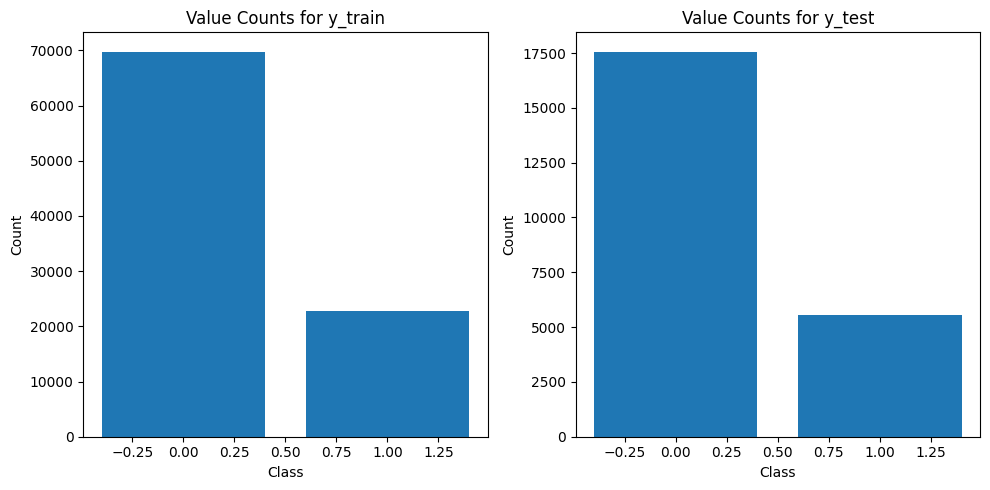

In [21]:
train_value_counts = y_train.value_counts()
test_value_counts = y_test.value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(train_value_counts.index, train_value_counts.values)
axs[0].set_title('Value Counts for y_train')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')

axs[1].bar(test_value_counts.index, test_value_counts.values)
axs[1].set_title('Value Counts for y_test')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Standardise numberical variables

In [13]:
numerical_columns = ['review_score', 'price', 'freight_value', 'payment_installments', 'payment_value']

scaler = StandardScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42) 

In [14]:
X_train.columns

Index(['review_score', 'price', 'freight_value', 'payment_installments',
       'payment_value', 'customer_state_MG', 'customer_state_Others',
       'customer_state_RJ', 'customer_state_SP', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_voucher', 'seller_state_MG', 'seller_state_Others',
       'seller_state_PR', 'seller_state_SP',
       'product_category_Beauty & Health',
       'product_category_Books & Stationery', 'product_category_Electronics',
       'product_category_Entertainment', 'product_category_Fashion',
       'product_category_Food & Drinks', 'product_category_Furniture',
       'product_category_Home & Garden',
       'product_category_Industry & Construction'],
      dtype='object')

# Logistic Regression

## Drop one dummy variable for each category to avoid multicollinearity

In [15]:
columns_to_drop = ['customer_state_Others', 'payment_type_voucher', 'seller_state_Others', 'product_category_Home & Garden']
X_train = X_train.drop(columns_to_drop, axis=1)
X_test = X_test.drop(columns_to_drop, axis=1)

In [26]:
X_train = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.544887
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Churned   No. Observations:                92487
Model:                          Logit   Df Residuals:                    92464
Method:                           MLE   Df Model:                           22
Date:                Wed, 10 Apr 2024   Pseudo R-squ.:                 0.02218
Time:                        15:36:32   Log-Likelihood:                -50395.
converged:                       True   LL-Null:                       -51538.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4

In [30]:
X_test = sm.add_constant(X_test)
y_pred_probs = result.predict(X_test)
y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred_probs]
print(classification_report(y_test, y_pred_binary))
f1 = f1_score(y_test, y_pred_binary, average='weighted')
print("F1:", f1)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     17565
           1       0.50      0.00      0.00      5557

    accuracy                           0.76     23122
   macro avg       0.63      0.50      0.43     23122
weighted avg       0.70      0.76      0.66     23122

F1: 0.6562365779450458


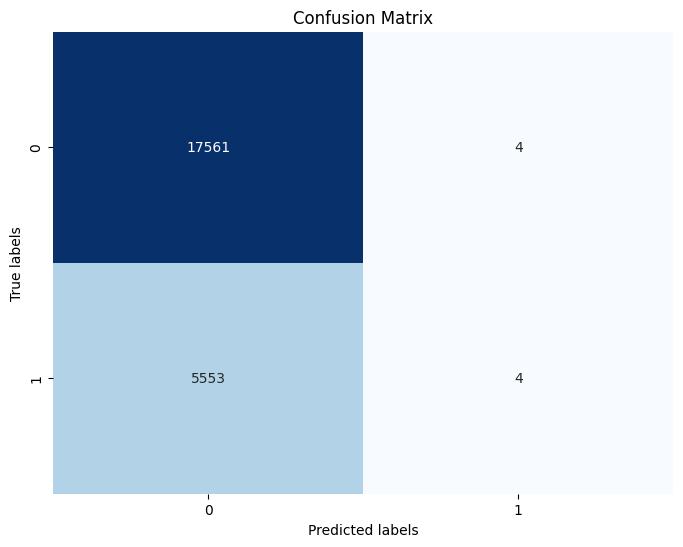

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [31]:
rf_classifier = RandomForestClassifier(random_state=10)
rf_classifier.fit(X_train, y_train)
train_accuracy = rf_classifier.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)
test_accuracy = rf_classifier.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9924746180544293
Testing Accuracy: 0.8241934088746649


In [32]:
predicted_y = rf_classifier.predict(X_test)
y_pred_binary = [1 if prob > 0.5 else 0 for prob in predicted_y]
print(classification_report(y_test, y_pred_binary))
f1 = f1_score(y_test, y_pred_binary, average='weighted')
print("F1:", f1)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     17565
           1       0.73      0.42      0.54      5557

    accuracy                           0.82     23122
   macro avg       0.79      0.69      0.71     23122
weighted avg       0.81      0.82      0.81     23122

F1: 0.8062289231257497


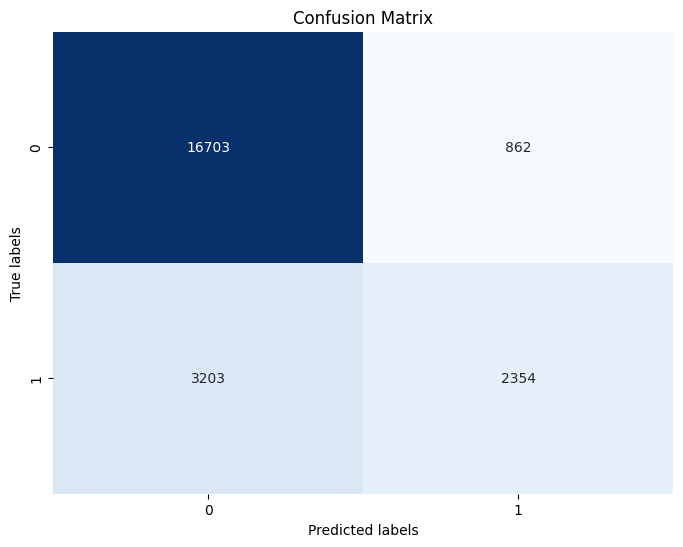

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

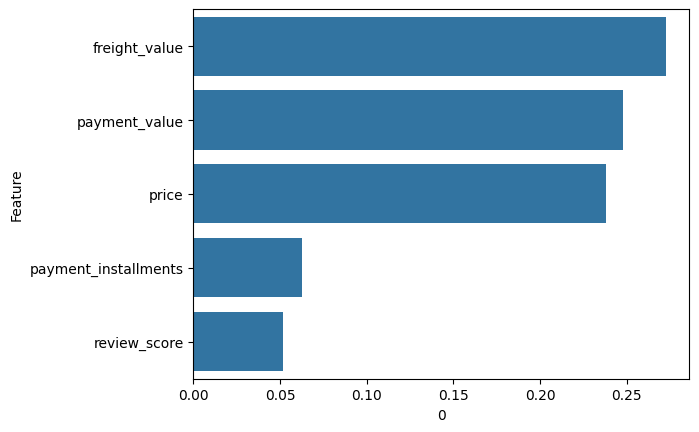

In [34]:
feature_importances = pd.DataFrame(rf_classifier.feature_importances_)
feature_importances["Feature"] = X_train.columns
sns.barplot(x=0, y='Feature', data=feature_importances.sort_values(by=0,ascending=False)[:5])
plt.show()

# SVM

In [38]:
#Baseline SVM default: rbf, C = 1.0
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
train_accuracy = svc.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)
test_accuracy = svc.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)
print(classification_report(y_test, svc.predict(X_test)))

fpr, tpr, thresholds = roc_curve(y_test, svc.predict(X_test))
roc_auc = auc(fpr, tpr)
print("Area under the curve:", roc_auc)

Training Accuracy: 0.7570253116654232
Testing Accuracy: 0.7611365798806332
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     17565
           1       0.85      0.01      0.01      5557

    accuracy                           0.76     23122
   macro avg       0.81      0.50      0.44     23122
weighted avg       0.78      0.76      0.66     23122

Area under the curve: 0.5034897809575488


## Fine-tuning

I did not run the code in this section, becuase the svm baseline model alone took 2 hours. Perhaps we should delegate this task to Airflow.

In [ ]:
#Grid-search for parameter tuning
kernel = ['linear','rbf','poly','sigmoid']
C = [0.1, 1, 10]

for k in kernel: 
    for c in C:
        svc = SVC(kernel=k, probability=True, random_state=42, C=c)
        svc.fit(X_train, y_train)
        print("kernal: ", k)
        print("C: ", c)

        train_accuracy = svc.score(X_train, y_train)
        print("Training Accuracy:", train_accuracy)
        val_accuracy = svc.score(X_val, y_val)
        print("Validation Accuracy:", val_accuracy)
        print(classification_report(y_val, svc.predict(X_val)))
        
        fpr, tpr, thresholds = roc_curve(y_val, svc.predict(X_val))
        roc_auc = auc(fpr, tpr)
        print("Area under the curve:", auc)

# Neural Network

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers

In [45]:
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1], ), activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid') #softmax
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

    
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

MODEL_SAVE_NAME = 'churn_prediction_NN.keras'
train_results = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5), 
                              ModelCheckpoint(MODEL_SAVE_NAME, save_best_only=True)])

Epoch 1/100


c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2891/2891 ━━━━━━━━━━━━━━━━━━━━ 3s 681us/step - accuracy: 0.7519 - loss: 0.5517 - val_accuracy: 0.7593 - val_loss: 0.5357
Epoch 2/100
2891/2891 ━━━━━━━━━━━━━━━━━━━━ 2s 650us/step - accuracy: 0.7541 - loss: 0.5398 - val_accuracy: 0.7607 - val_loss: 0.5291
Epoch 3/100
2891/2891 ━━━━━━━━━━━━━━━━━━━━ 2s 627us/step - accuracy: 0.7581 - loss: 0.5299 - val_accuracy: 0.7607 - val_loss: 0.5221
Epoch 4/100
2891/2891 ━━━━━━━━━━━━━━━━━━━━ 2s 638us/step - accuracy: 0.7573 - loss: 0.5220 - val_accuracy: 0.7604 - val_loss: 0.5192
Epoch 5/100
2891/2891 ━━━━━━━━━━━━━━━━━━━━ 2s 653us/step - accuracy: 0.7613 - loss: 0.5120 - val_accuracy: 0.7638 - val_loss: 0.5120
Epoch 6/100
2891/2891 ━━━━━━━━━━━━━━━━━━━━ 2s 660us/step - accuracy: 0.7607 - loss: 0.5114 - val_accuracy: 0.7611 - val_loss: 0.5169
Epoch 7/100
2891/2891 ━━━━━━━━━━━━━━━━━━━━ 2s 654us/step - accuracy: 0.7648 - loss: 0.5055 - val_accuracy: 0.7650 - val_loss: 0.5089
Epoch 8/100
2891/2891 ━━━━━━━━━━━━━━━━━━━━ 2s 650us/step - accuracy: 0.7619 - los

Training Accuracy: 0.7811800837516785
Testing Accuracy: 0.7717325687408447


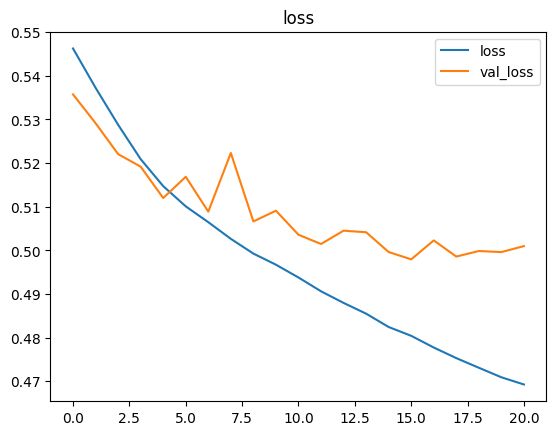

In [46]:
train_accuracy = max(train_results.history['accuracy'])
print("Training Accuracy:", train_accuracy)
test_accuracy = max(train_results.history['val_accuracy'])
print("Testing Accuracy:", test_accuracy)

plt.title('loss')
plt.plot(train_results.history['loss'], label='loss')
plt.plot(train_results.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      8792
           1       0.58      0.17      0.26      2769

    accuracy                           0.77     11561
   macro avg       0.69      0.57      0.56     11561
weighted avg       0.74      0.77      0.72     11561



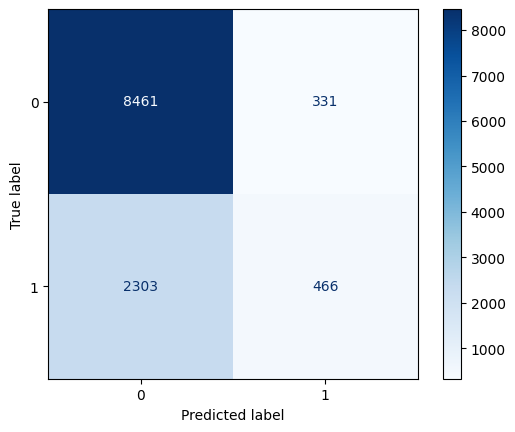

In [51]:
model = load_model("churn_prediction_NN.keras")

y_pred = model.predict(X_test).argmax(axis=1)

print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
plt.show()

In [49]:
f1 = f1_score(y_test, y_pred)
print("F1:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the curve:", roc_auc)

F1: 0.26135726303982054
Area under the curve: 0.5653219702010857


# XGBoost

In [50]:
import xgboost as xgb

In [52]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

y_test_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.8265810330100447
Testing Accuracy: 0.8140299282069026
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      8792
           1       0.78      0.31      0.45      2769

    accuracy                           0.81     11561
   macro avg       0.80      0.64      0.67     11561
weighted avg       0.81      0.81      0.78     11561



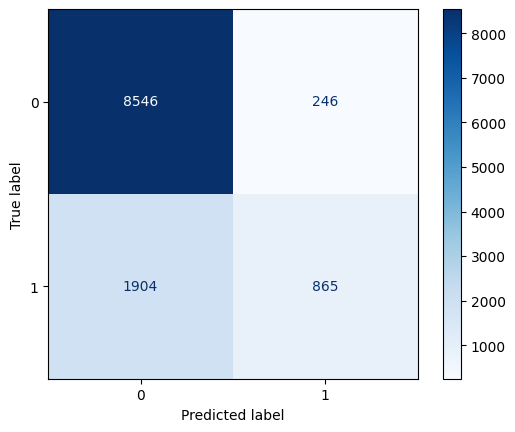

In [53]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot(cmap='Blues')
plt.show()

In [54]:
f1 = f1_score(y_test, y_test_pred)
print("F1:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
print("Area under the curve:", roc_auc)

F1: 0.44587628865979384
Area under the curve: 0.6422035807857106
